In [42]:
import torch
from torchvision import datasets, transforms
import numpy as np
import os
import matplotlib.pyplot as plt
from collections import defaultdict

Dataset 1 Class Distribution
Dataset Class Metrics:
Total Number of Images: 2009
Number of Classes: 3
Number of Images per Class: {'bacterial spot': 704, 'healthy': 678, 'late blight': 627}


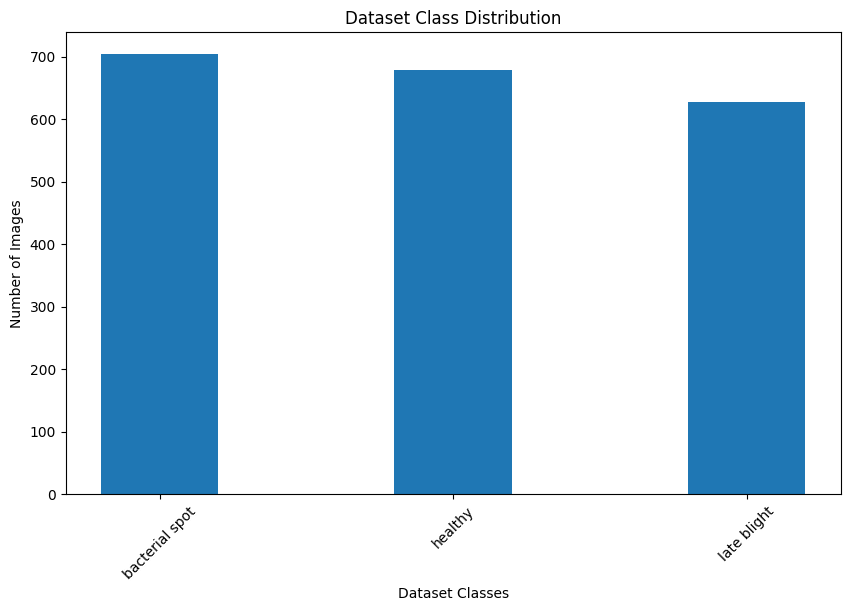

Dataset 2 Class Distribution
Dataset Class Metrics:
Total Number of Images: 14658
Number of Classes: 6
Number of Images per Class: {'early blight': 2455, 'healthy': 3051, 'late blight': 3113, 'mosaic virus': 2153, 'powdery mildew': 1004, 'septoria': 2882}


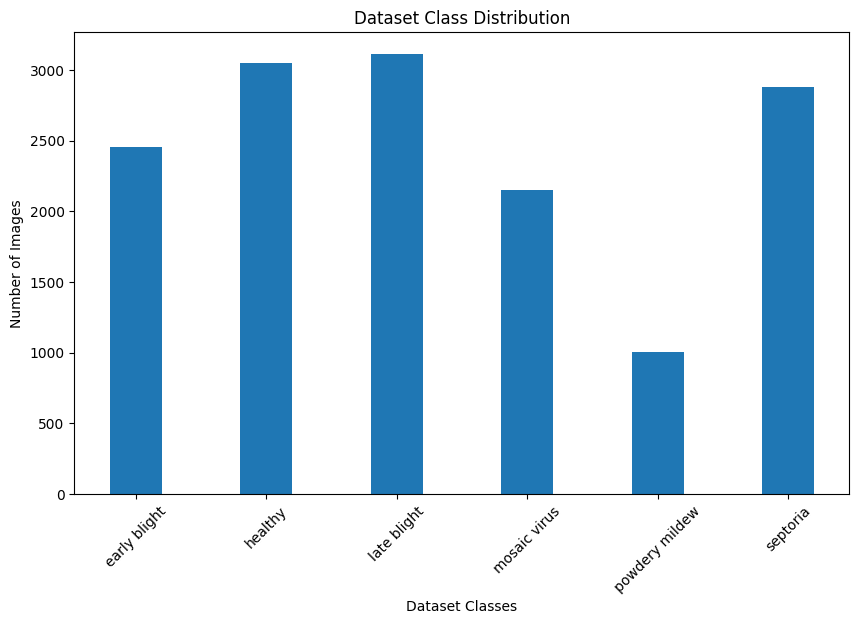

Dataset 3 Class Distribution
Dataset Class Metrics:
Total Number of Images: 18160
Number of Classes: 10
Number of Images per Class: {'bacterial spot': 2127, 'early blight': 1000, 'healthy': 1591, 'late blight': 1909, 'leaf mold': 952, 'mosaic virus': 373, 'septoria': 1771, 'spider mite': 1676, 'target spot': 1404, 'yellow leaf curl': 5357}


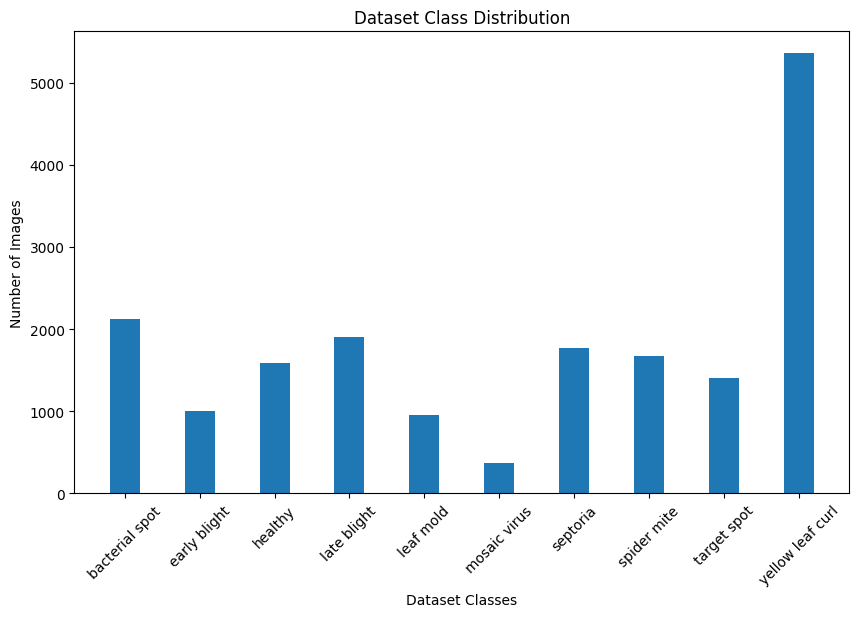

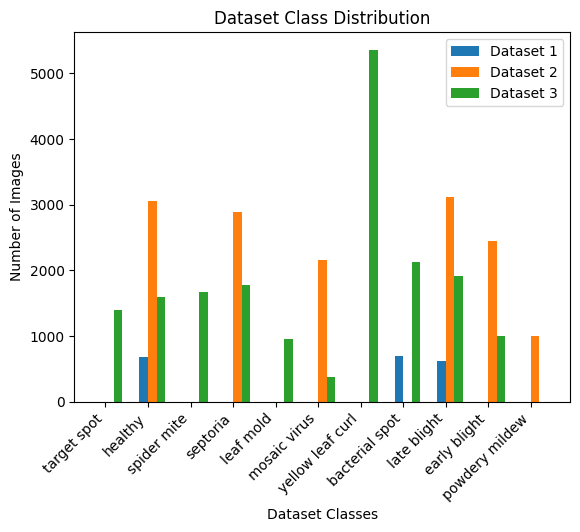

In [43]:

dataset_paths = ['/Users/aswiinraviprakash/Desktop/hyperparameter/Dataset Metrics/dataset_1', '/Users/aswiinraviprakash/Desktop/hyperparameter/Dataset Metrics/dataset_2', '/Users/aswiinraviprakash/Desktop/hyperparameter/Dataset Metrics/dataset_3']
images_per_class_list = {}
counter = 1;

for dataset_path in dataset_paths:

    print(f'Dataset {counter} Class Distribution')

    dataset = datasets.ImageFolder(root=dataset_path)

    num_classes = len(dataset.classes)

    total_images = len(dataset)

    images_per_class = {class_name: len(os.listdir(os.path.join(dataset_path, class_name))) 
                        for class_name in dataset.classes}

    print("Dataset Class Metrics:")
    print("Total Number of Images:", total_images)
    print("Number of Classes:", num_classes)
    print("Number of Images per Class:", images_per_class)

    images_per_class_list[f'Dataset {counter}'] = images_per_class

    plt.figure(figsize=(10, 6))
    plt.bar(images_per_class.keys(), images_per_class.values(), width = 0.4)
    plt.xlabel('Dataset Classes')
    plt.ylabel('Number of Images')
    plt.title('Dataset Class Distribution')
    plt.xticks(rotation=45)
    plt.show()

    counter = counter + 1

dataset_total_classes = set().union(*(image_per_class.keys() for image_per_class in images_per_class_list.values()))

total_class_length = np.arange(len(dataset_total_classes))
width = 0.2

fig, subplot = plt.subplots()
for i, (dataset, data) in enumerate(images_per_class_list.items()):
    values = [data.get(category, 0) for category in dataset_total_classes]
    subplot.bar(total_class_length + i * width - width/2, values, width, label=dataset)

subplot.set_xlabel('Dataset Classes')
subplot.set_ylabel('Number of Images')
subplot.set_title('Dataset Class Distribution')
subplot.set_xticks(total_class_length)
subplot.set_xticklabels(dataset_total_classes, rotation=45, ha='right')
subplot.legend()

plt.show()


In [44]:
dataset_paths = ['/Users/aswiinraviprakash/Desktop/hyperparameter/Dataset Metrics/dataset_1', '/Users/aswiinraviprakash/Desktop/hyperparameter/Dataset Metrics/dataset_2', '/Users/aswiinraviprakash/Desktop/hyperparameter/Dataset Metrics/dataset_3']
images_per_class_list = {}
counter = 1;

for dataset_path in dataset_paths:

    dataset = datasets.ImageFolder(root=dataset_path)

    total_size = 0
    total_width = 0
    total_height = 0

    for image_path, label in dataset.imgs:
        size = os.path.getsize(image_path)
        total_size += size

        width, height = dataset.loader(image_path).size
        total_width += width
        total_height += height
        
    avg_size_kb = total_size / len(dataset) / 1024
    avg_width = total_width / len(dataset)
    avg_height = total_height / len(dataset)

    print(f'Dataset {counter} Average Size')
    print("Average Image Size (Kb):", avg_size_kb)

    counter = counter + 1


Dataset 1 Average Size
Average Image Size (Kb): 9.67169368700224
Dataset 2 Average Size
Average Image Size (Kb): 54.388350018441294
Dataset 3 Average Size
Average Image Size (Kb): 15.484619947257022


Average Number of Channels per Image: 3.0
Average Standard Deviation: 0.21033944189548492


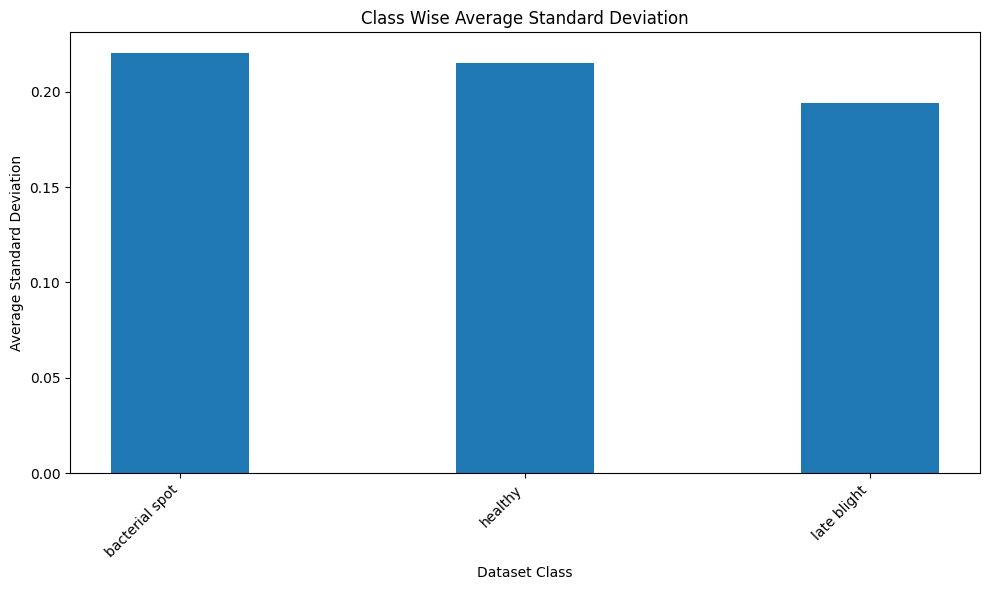

Average Number of Channels per Image: 3.0
Average Standard Deviation: 0.17849397659301758


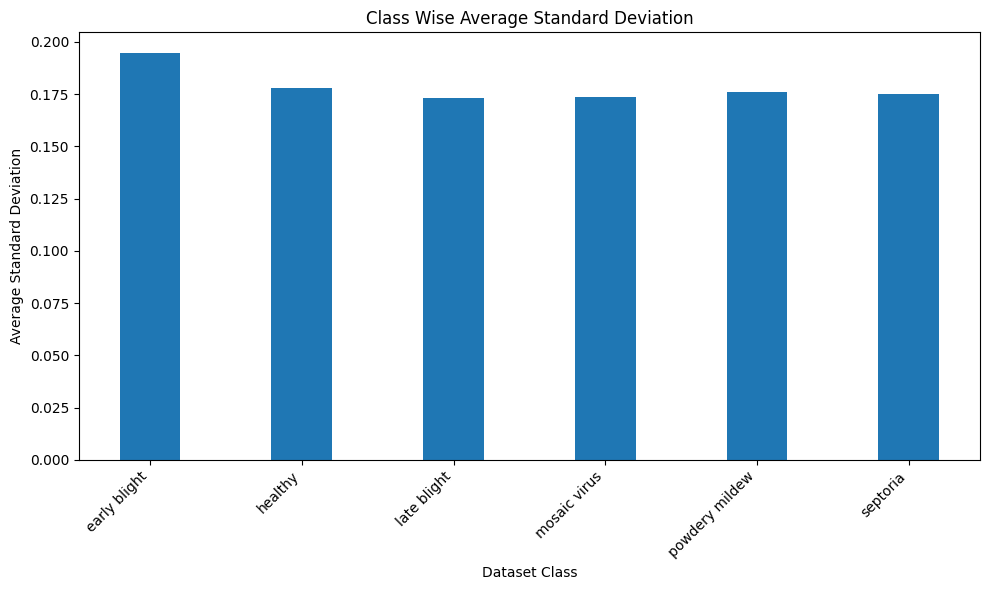

Average Number of Channels per Image: 3.0
Average Standard Deviation: 0.16452179849147797


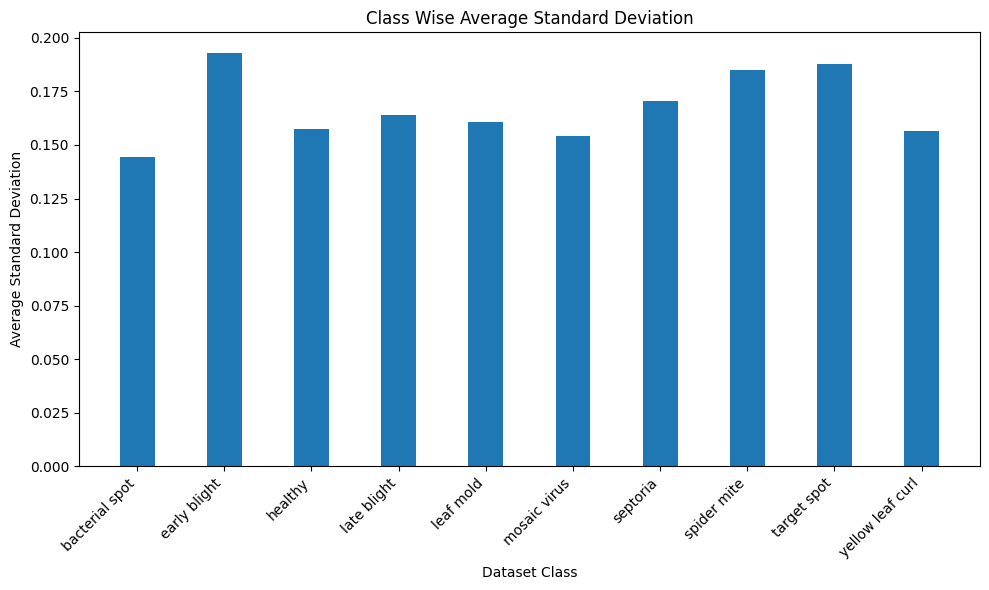

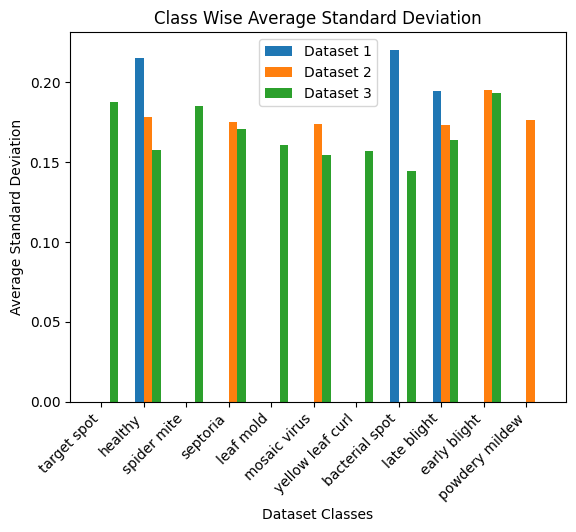

In [45]:
dataset_paths = ['/Users/aswiinraviprakash/Desktop/hyperparameter/Dataset Metrics/dataset_1', '/Users/aswiinraviprakash/Desktop/hyperparameter/Dataset Metrics/dataset_2', '/Users/aswiinraviprakash/Desktop/hyperparameter/Dataset Metrics/dataset_3']
images_per_class_list = {}
counter = 1;

for dataset_path in dataset_paths:
    
    transform = transforms.Compose([
        transforms.ToTensor()
    ])

    dataset = datasets.ImageFolder(root=dataset_path, transform=transform)

    total_channels = 0
    class_std_devs = defaultdict(list)
    average_std_devs = []

    for image, label in dataset:
        
        num_channels = image.size(0)
        total_channels += num_channels

        for channel in range(num_channels):
            channel_std_dev = torch.std(image[channel])
            average_std_devs.append(channel_std_dev.item())
            class_std_devs[dataset.classes[label]].append(channel_std_dev.item())

    avg_channels = total_channels / len(dataset)

    dataset_std_dev = torch.tensor(average_std_devs).mean().item()

    per_class_avg_std_devs = {}
    for label, std_devs in class_std_devs.items():
        per_class_avg_std_devs[label] = torch.tensor(std_devs).mean().item()

    images_per_class_list[f'Dataset {counter}'] = per_class_avg_std_devs


    print("Average Number of Channels per Image:", avg_channels)
    print("Average Standard Deviation:", dataset_std_dev)

    labels = list(per_class_avg_std_devs.keys())
    values = list(per_class_avg_std_devs.values())

    plt.figure(figsize=(10, 6))
    plt.bar(labels, values, width=0.4)
    plt.xlabel('Dataset Class')
    plt.ylabel('Average Standard Deviation')
    plt.title('Class Wise Average Standard Deviation')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    counter = counter + 1

dataset_total_classes = set().union(*(image_per_class.keys() for image_per_class in images_per_class_list.values()))

total_class_length = np.arange(len(dataset_total_classes))
width = 0.2

fig, subplot = plt.subplots()
for i, (dataset, data) in enumerate(images_per_class_list.items()):
    values = [data.get(category, 0) for category in dataset_total_classes]
    subplot.bar(total_class_length + i * width - width/2, values, width, label=dataset)

subplot.set_xlabel('Dataset Classes')
subplot.set_ylabel('Average Standard Deviation')
subplot.set_title('Class Wise Average Standard Deviation')
subplot.set_xticks(total_class_length)
subplot.set_xticklabels(dataset_total_classes, rotation=45, ha='right')
subplot.get_tightbbox()
subplot.legend()

plt.show()
